<a href="https://colab.research.google.com/github/deepali9976/DEL_LAB_1BM22AI041/blob/main/Lab_10_(23_12_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0297
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.0297e-04
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 1.4334e-04
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 1.2481e-04
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 1.4164e-04
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 1.1484e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 1.3398e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 1.3166e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 1.0671e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 1.1086e-04
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Root Mean Squared Error (RMSE): 3.7709


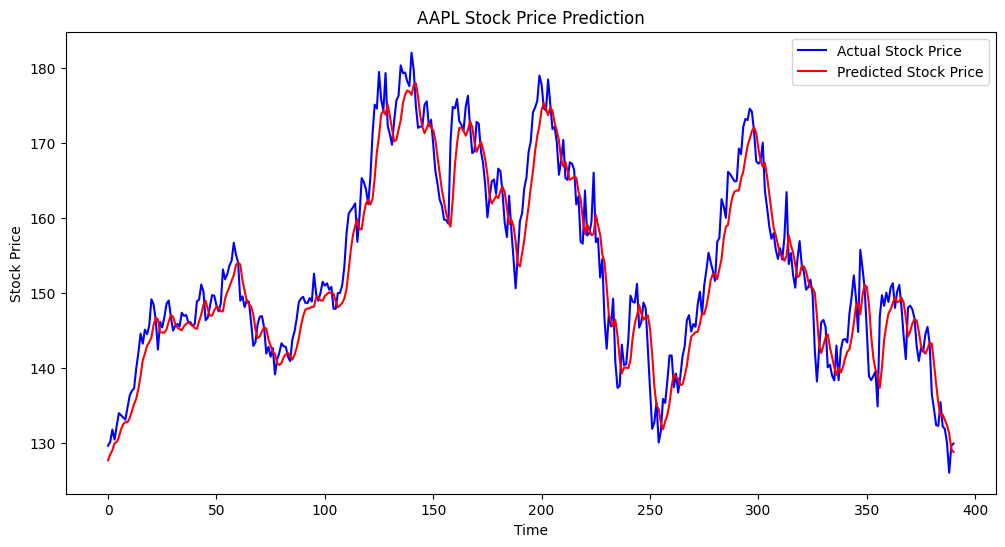

In [ ]:

def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data


def preprocess_data(data, sequence_length):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Close']].values)

    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler


def build_gru_model(input_shape):
    model = Sequential([
        GRU(units=50, return_sequences=True, input_shape=input_shape),
        GRU(units=50),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_model(model, X_train, y_train, epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return history


def predict_and_evaluate(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return predictions, y_test, rmse

if __name__ == "__main__":

    ticker = "AAPL"
    start_date = "2015-01-01"
    end_date = "2023-01-01"
    sequence_length = 60
    epochs = 10
    batch_size = 32


    data = fetch_data(ticker, start_date, end_date)
    X, y, scaler = preprocess_data(data, sequence_length)


    train_size = int(len(X) * 0.8)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]


    model = build_gru_model((X_train.shape[1], 1))
    train_model(model, X_train, y_train, epochs, batch_size)


    predictions, y_test, rmse = predict_and_evaluate(model, X_test, y_test, scaler)
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(y_test, color='blue', label='Actual Stock Price')
    plt.plot(predictions, color='red', label='Predicted Stock Price')
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()